In [14]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

generating new axis
['$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$']


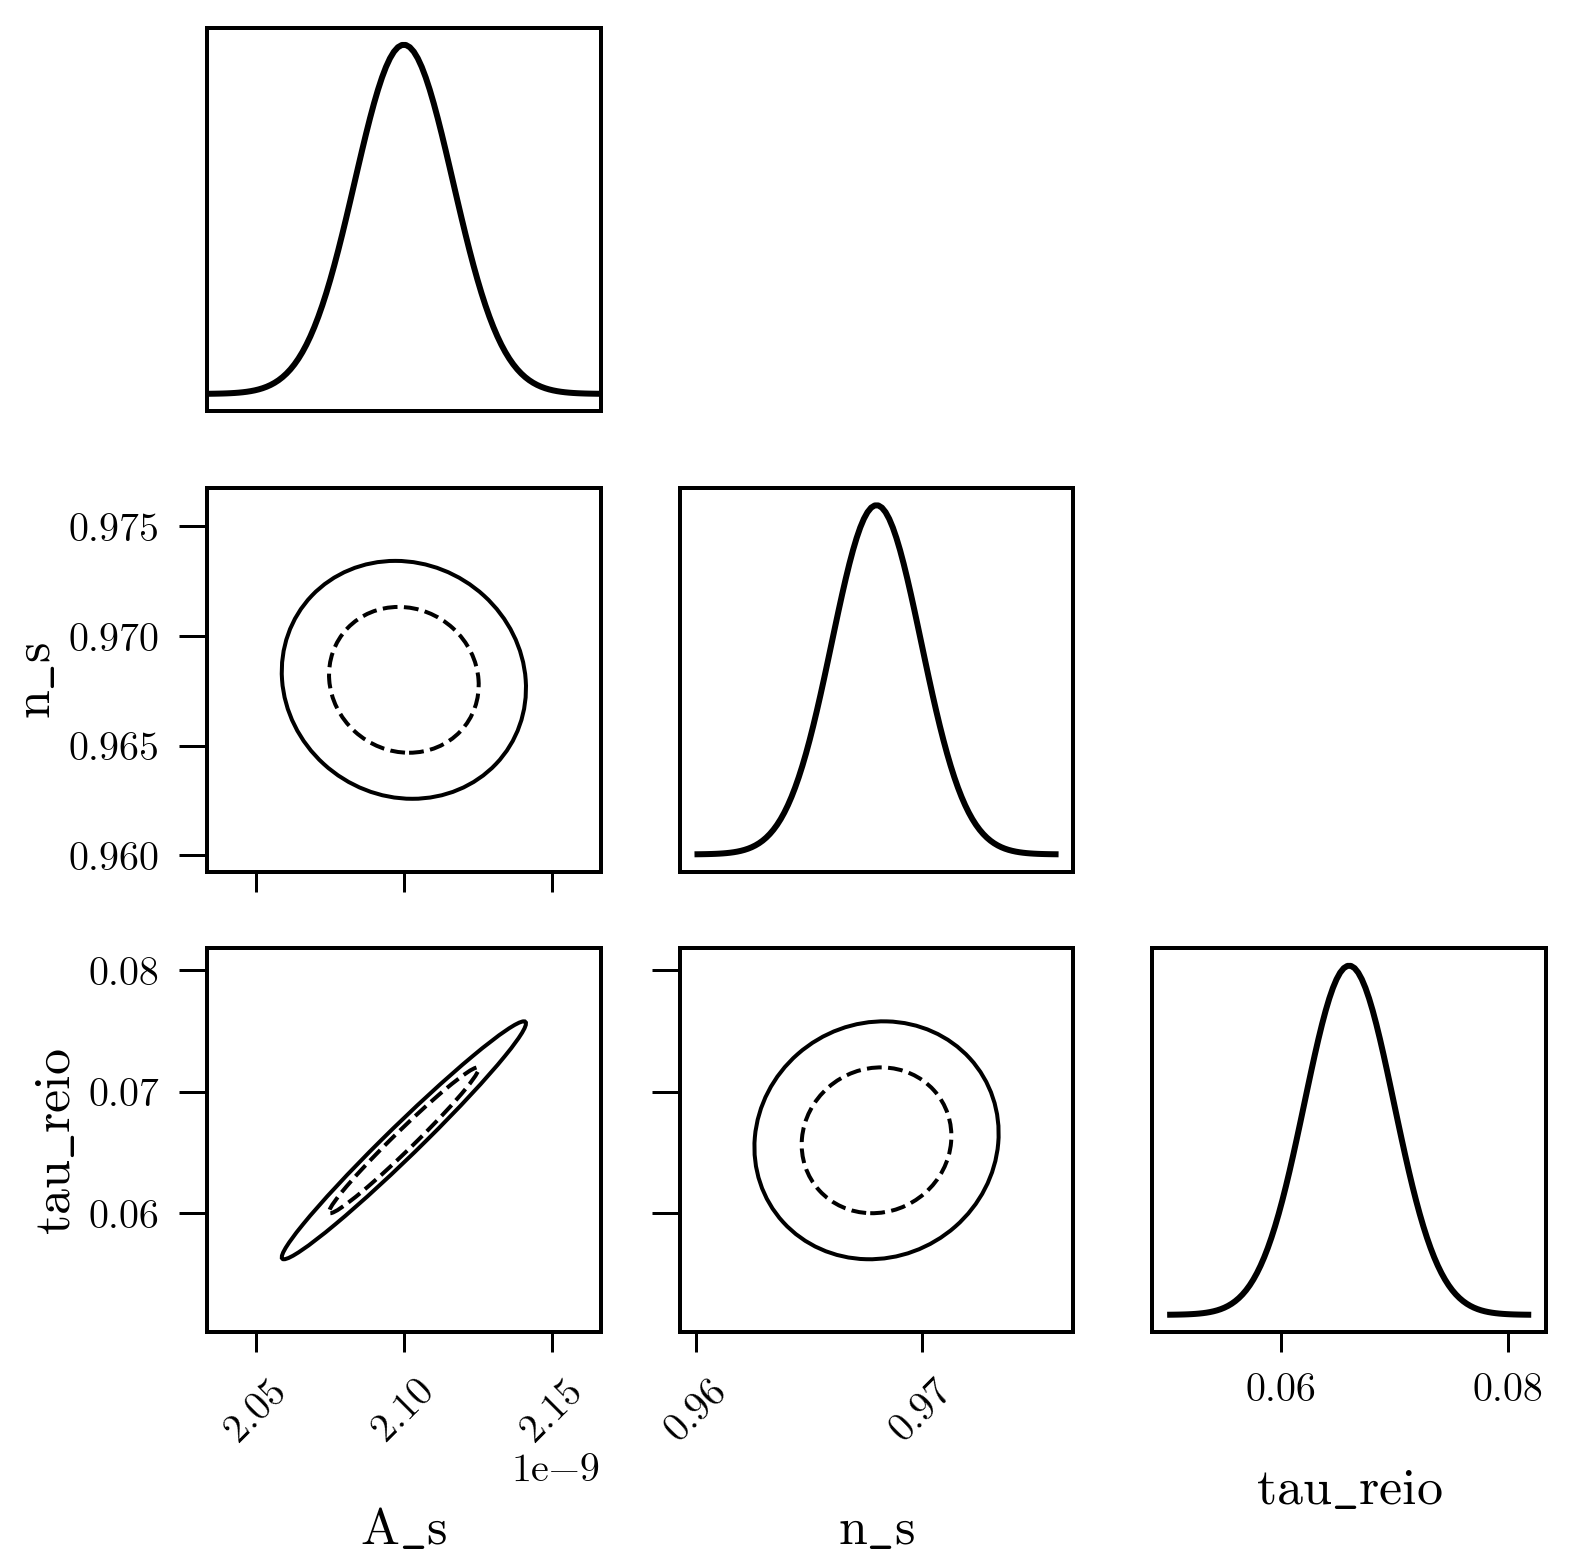

In [17]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np

# create an Observables object to store information for derivatives
obs = Observables(
    parameters=['A_s', 'n_s', 'tau_reio'],
    fiducial=[2.1e-9, 0.968, 0.066],
    left=[2.0e-9, 0.948, 0.056],
    right=[2.2e-9, 0.988, 0.076])

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 2500,
                   'lensing': 'yes'}
# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))

# generate the fiducial cosmology
obs.compute_cosmo(key='CLASS_fiducial', classy_dict=classy_template)

# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_CLASS_left', classy_dict=classy_left)
    obs.compute_cosmo(key=par + '_CLASS_right', classy_dict=classy_right)

# compute the Fisher matrix with a Planck-like experiment
example_Planck = fishchips.experiments.CMB_Primary(
    theta_fwhm=[7.], sigma_T=[33.], sigma_P=[56.],
    f_sky=0.65, l_min=2, l_max=2500)
fisher = example_Planck.get_fisher(obs)

# use the plotting utility to get some dope ellipses for 1,2 sigma.
cov = np.linalg.inv(fisher)
fishchips.util.plot_triangle(obs, cov);


In [16]:
import matplotlib.pyplot as plt
fig.savefig('basic_output.png')